<a href="https://colab.research.google.com/github/Akash62000/DS-D18-Tasks-/blob/main/Task-6/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import itertools

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [5]:
df = pd.read_csv("car_data.csv")
df.head(10)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
5,15709.052821,22236,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
6,15230.003390,22576,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
7,15048.042184,22964,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
8,14862.093870,24021,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
9,15295.018267,27325,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1


Tasks, Part 1

In [41]:
car_lr = LinearRegression()
X = df[['Mileage']]
y = df['Price']

In [42]:
car_lr.fit(X, y)

LinearRegression()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not h

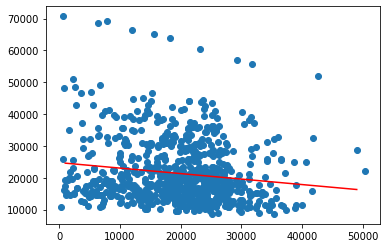

In [45]:
plt.scatter(X, y)

mileages = [mileage * 1000 for mileage in range(1, 50)]
predicted_prices = [car_lr.predict([[mileage]]) for mileage in mileages]
plt.plot(mileages, predicted_prices, color='red')


In [46]:
print('Coefficient',car_lr.coef_)
print('Intercept', car_lr.intercept_)
print('R-squared', car_lr.score(X,y))

Coefficient [-0.1725205]
Intercept 24764.559006061685
R-squared 0.02046344732348926


Because of an R-squared value of 0.02, we determine that a equation is not a great fit for our data (R2 < 0.8) i.e; it is not strongly corelated


**Linear Regression Equation** =  -0.17x + 24764.6

Tasks, Part 2

In [47]:
car_mlr = LinearRegression()

In [48]:
columns = ['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']
X = df[columns]
y = df['Price']

In [49]:
car_mlr.fit(X, y)

LinearRegression()

In [51]:
print('Intercept', car_mlr.intercept_)
print()
print('R-squared', car_mlr.score(X,y))

Intercept 6758.755143598106

R-squared 0.4462643536728379


In [52]:
coeff=list(zip(columns, car_mlr.coef_))
print(coeff)

[('Mileage', -0.16974783233303692), ('Cylinder', 3792.378930782515), ('Liter', -787.2207316338321), ('Doors', -1542.745846382068), ('Cruise', 6288.997149849932), ('Sound', -1993.795275698427), ('Leather', 3349.361619613555)]


In [53]:
#Given a car with 40,000 miles, 6 cylinders, a 3.1 liter engine,
#2 doors, cruise control, a sound system and leather interior:
#We predict a price of 24.8k from our model
car_mlr.predict([[40000, 6, 3.1, 2, 1,1,1]])


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([24841.80296791])

In [54]:
car_lr3 = LinearRegression()
X = df[['Mileage','Cylinder']]
y = df['Price']

In [55]:
feature_columns = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
price = df['Price']

combinations = [list(itertools.combinations(feature_columns, x)) for x in range(1,7)]
massaged_combos = []
for lst in combinations:
    for iterable in lst:
        massaged_combos.append(list(iterable))

scores = []
for lst in massaged_combos:
    regr_cars = linear_model.LinearRegression()
    regr_cars.fit(df[lst], price)
    scores.append((regr_cars.score(df[lst], price), lst))

sorted(scores, reverse=True)
print('Highest',sorted(scores)[0:20])
print('')
print('Lowest',sorted(scores)[-2])

Highest [(0.015462387624189389, ['Sound']), (0.019251466591467037, ['Doors']), (0.02046344732348926, ['Mileage']), (0.024710851264124534, ['Leather']), (0.03688121596735017, ['Mileage', 'Sound']), (0.03701628770903431, ['Doors', 'Sound']), (0.04039914867118721, ['Mileage', 'Doors']), (0.04141817346866039, ['Doors', 'Leather']), (0.04521956340886857, ['Mileage', 'Leather']), (0.04795369092082724, ['Sound', 'Leather']), (0.05925054392042661, ['Mileage', 'Doors', 'Sound']), (0.06256392121987697, ['Mileage', 'Doors', 'Leather']), (0.06687313316188848, ['Doors', 'Sound', 'Leather']), (0.06965940622436506, ['Mileage', 'Sound', 'Leather']), (0.08933709379370725, ['Mileage', 'Doors', 'Sound', 'Leather']), (0.1856330092969276, ['Cruise']), (0.19288948066869627, ['Cruise', 'Sound']), (0.1996382468921617, ['Doors', 'Cruise']), (0.2083536888853531, ['Doors', 'Cruise', 'Sound']), (0.2093138558315859, ['Mileage', 'Cruise'])]

Lowest (0.437805741536638, ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Crui

The combinations that best predict price as measured by R2 value are:

Sound: R-squared = 0.015
Doors: R-Squared = 0.019
Mileage
Leather
Mileage, Sound
Doors,Sound
The lowest are:

Last: Mileage, Cylinder, Doors, Cruise, Sound, Leather | R2 = 0.445

Penultimate: Mileage, Cylinder, Liter, Doors, Cruise, Leather | R2 = 0.438

Tasks, Part 3


In [56]:
dummy_make = pd.get_dummies(df[['Make']])
dummy_model = pd.get_dummies(df[['Model']])
dummy_type = pd.get_dummies(df[['Type']])